## Assignment 3 - Time Series

1. Download the adjusted close price for AAPL, INTC, EBAY and AMZN for the last 60 months
2. Select the adjusted monthend close price for each of the stocks.
3. Use pandas autocorrelation_plot() function to plot the autocorrelation of the monthend close prices of each of the stocks.  <i>Are they autocorrelated?  Why or why not?</i>
4. Calculate the monthly return over the period for each stock using the “shift trick” on the lecture slide titled Shifting (Note: you should end up with a time series 59 months long)
5. Plot the autocorrelation of the monthly returns.  <i>Are they autocorrelated?  Why or why not?</i>
6. <i>OPTIONAL: Visualize the correlation between the returns of all pairs of stocks using a scatterplot matrix (1 bonus mark)</i>
7. <i>OPTIONAL: Following the instructions in the article "The Glowing Python"  visualize the correlation of the returns of all pairs of stocks (2 bonus marks)</i>

In [468]:
# the usual boilerplate stuff

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import quandl
from pandas import plotting
from pandas.tseries.offsets import *

quandl.ApiConfig.api_key = 'j1rPJCD2sDK9zg-JE18D'

from dateutil.relativedelta import relativedelta
from datetime import datetime

from IPython.display import HTML, display

pylab.rcParams['figure.figsize'] = (15, 9)

plt.ioff()


<b>Step 1 :</b> Download the adjusted close price for AAPL, INTC, EBAY and AMZN for the last 60 months

In [469]:
MONTH_COUNT = 60

def get_end_date():
    dt = datetime.today()
    dt = datetime.strptime(dt.strftime('%Y-%m-%d'),'%Y-%m-%d')
    return dt;

def get_start_date():
    MONTH_COUNT
    dt = get_end_date() - relativedelta(months=MONTH_COUNT)
    return dt;

    
def get_stock_data(stk, month_count):
    end = get_end_date()
    start = get_start_date()
    
    print("Returning ",stk,"data for Start and End dates : ", start, end)
    data = quandl.get("WIKI/" + stk, start_date=start, end_date=end)
    return data


Get data for AAPL (Apple)

In [470]:
apple = get_stock_data("AAPL", 60)
display(HTML(apple.tail().to_html()))

Returning  AAPL data for Start and End dates :  2013-11-17 00:00:00 2018-11-17 00:00:00


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0


Get data for Intel (INTC)

In [471]:
intel = get_stock_data("INTC", 60)
display(HTML(intel.head().to_html()))

Returning  INTC data for Start and End dates :  2013-11-17 00:00:00 2018-11-17 00:00:00


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2013-11-18,24.61,24.70,24.48,24.60,24712500.0,0.0,1.0,21.664733,21.743962,21.550291,21.655930,24712500.0
2013-11-19,24.74,24.87,24.61,24.70,24870200.0,0.0,1.0,21.779175,21.893617,21.664733,21.743962,24870200.0
2013-11-20,24.70,24.82,24.46,24.56,20288600.0,0.0,1.0,21.743962,21.849600,21.532684,21.620717,20288600.0
2013-11-21,24.61,25.29,24.52,25.23,44050600.0,0.0,1.0,21.664733,22.263352,21.585504,22.210533,44050600.0
2013-11-22,24.50,24.51,23.84,23.87,77908100.0,0.0,1.0,21.567897,21.576701,20.986885,21.013294,77908100.0


Get data for EBay (EBAY)

In [472]:
ebay = get_stock_data("EBAY", 60)
display(HTML(ebay.head().to_html()))

Returning  EBAY data for Start and End dates :  2013-11-17 00:00:00 2018-11-17 00:00:00


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2013-11-18,52.33,52.69,51.73,52.08,12753900.0,0.0,1.0,20.587472,20.729102,20.351422,20.489118,12753900.0
2013-11-19,52.43,52.50,51.94,52.13,10263300.0,0.0,1.0,20.626813,20.654353,20.434040,20.508789,10263300.0
2013-11-20,52.48,52.50,49.86,50.39,34262800.0,0.0,1.0,20.646484,20.654353,19.615734,19.824244,34262800.0
2013-11-21,50.77,50.80,49.93,50.21,17609600.0,0.0,1.0,19.973743,19.985545,19.643273,19.753429,17609600.0
2013-11-22,50.27,50.52,50.18,50.33,13715700.0,0.0,1.0,19.777034,19.875388,19.741627,19.800639,13715700.0


Get data for Amazon (AMZN)

In [473]:
amazon = get_stock_data("AMZN", 60)
display(HTML(amazon.head().to_html()))

Returning  AMZN data for Start and End dates :  2013-11-17 00:00:00 2018-11-17 00:00:00


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2013-11-18,370.28,373.49,364.67,366.18,2737400.0,0.0,1.0,370.28,373.49,364.67,366.18,2737400.0
2013-11-19,365.82,368.78,362.50,364.94,1904800.0,0.0,1.0,365.82,368.78,362.50,364.94,1904800.0
2013-11-20,367.56,367.56,360.45,362.57,1771500.0,0.0,1.0,367.56,367.56,360.45,362.57,1771500.0
2013-11-21,364.05,369.25,363.30,368.92,1964600.0,0.0,1.0,364.05,369.25,363.30,368.92,1964600.0
2013-11-22,370.00,374.50,366.31,372.31,2965500.0,0.0,1.0,370.00,374.50,366.31,372.31,2965500.0


Lets take a look at the data we extracted

A. Apple

In [474]:
apple.info()
print()
intel.info()
print()
ebay.info()
print()
amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2013-11-18 to 2018-03-27
Data columns (total 12 columns):
Open           1094 non-null float64
High           1094 non-null float64
Low            1094 non-null float64
Close          1094 non-null float64
Volume         1094 non-null float64
Ex-Dividend    1094 non-null float64
Split Ratio    1094 non-null float64
Adj. Open      1094 non-null float64
Adj. High      1094 non-null float64
Adj. Low       1094 non-null float64
Adj. Close     1094 non-null float64
Adj. Volume    1094 non-null float64
dtypes: float64(12)
memory usage: 111.1 KB

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2013-11-18 to 2018-03-27
Data columns (total 12 columns):
Open           1094 non-null float64
High           1094 non-null float64
Low            1094 non-null float64
Close          1094 non-null float64
Volume         1094 non-null float64
Ex-Dividend    1094 non-null float64
Split Ratio    1094 non-null float64
Adj

Clearly there are no columns with null values. 

Lets calculate the number of week days between the start and end dates. Ideally it should match the size of the dataframes

In [475]:
businessDaily = pd.date_range(start=get_start_date(), end=get_end_date(), freq=BDay())
print(len(businessDaily))

1305


The number of records in the data is not even close to the number of business days in the date range. So there must be missing data

In [476]:
print("Apple :")
print("max:",apple.index.max(),"min:",apple.index.min(), end="\n\n")

print("Intel :")
print("max:",intel.index.max(),"min:",intel.index.min(), end="\n\n")

print("EBay :")
print("max:",ebay.index.max(),"min:",ebay.index.min(), end="\n\n")

print("Amazon :")
print("max:",amazon.index.max(),"min:",amazon.index.min(), end="\n\n")

Apple :
max: 2018-03-27 00:00:00 min: 2013-11-18 00:00:00

Intel :
max: 2018-03-27 00:00:00 min: 2013-11-18 00:00:00

EBay :
max: 2018-03-27 00:00:00 min: 2013-11-18 00:00:00

Amazon :
max: 2018-03-27 00:00:00 min: 2013-11-18 00:00:00



So, we dont have data beyond 2018-03-27 

We are interested only in the adjusted close prices, so lets drop the other columns

In [477]:
print("Apple")
apple = apple.drop(['Open','High','Low','Close','Volume','Ex-Dividend','Split Ratio','Adj. Open','Adj. High','Adj. Low','Adj. Volume'], axis=1)
display(HTML(apple.head().to_html()))

print("Intel")
intel = intel.drop(['Open','High','Low','Close','Volume','Ex-Dividend','Split Ratio','Adj. Open','Adj. High','Adj. Low','Adj. Volume'], axis=1)
display(HTML(intel.head().to_html()))

print("EBay")
ebay = ebay.drop(['Open','High','Low','Close','Volume','Ex-Dividend','Split Ratio','Adj. Open','Adj. High','Adj. Low','Adj. Volume'], axis=1)
display(HTML(ebay.head().to_html()))

print("Amazon")
amazon = amazon.drop(['Open','High','Low','Close','Volume','Ex-Dividend','Split Ratio','Adj. Open','Adj. High','Adj. Low','Adj. Volume'], axis=1)
display(HTML(amazon.head().to_html()))

Apple


,Adj. Close
Date,
2013-11-18,68.937464
2013-11-19,69.059886
2013-11-20,68.455088
2013-11-21,69.270701
2013-11-22,69.093116


Intel


,Adj. Close
Date,
2013-11-18,21.655930
2013-11-19,21.743962
2013-11-20,21.620717
2013-11-21,22.210533
2013-11-22,21.013294


EBay


,Adj. Close
Date,
2013-11-18,20.489118
2013-11-19,20.508789
2013-11-20,19.824244
2013-11-21,19.753429
2013-11-22,19.800639


Amazon


,Adj. Close
Date,
2013-11-18,366.18
2013-11-19,364.94
2013-11-20,362.57
2013-11-21,368.92
2013-11-22,372.31


Lets look at a visual representation of the data as well

,Apple,Intel,Amazon,EBay
Date,,,,
2013-11-18,68.937464,21.655930,366.18,20.489118
2013-11-19,69.059886,21.743962,364.94,20.508789
2013-11-20,68.455088,21.620717,362.57,19.824244
2013-11-21,69.270701,22.210533,368.92,19.753429
2013-11-22,69.093116,21.013294,372.31,19.800639


<Figure size 1080x648 with 0 Axes>

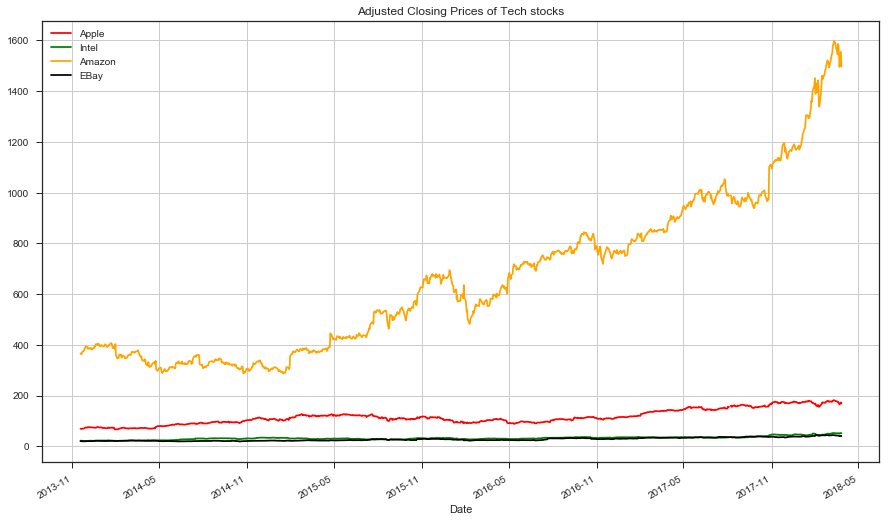

In [478]:
tech_stocks = pd.DataFrame({"Apple": apple["Adj. Close"],
                      "Intel": intel["Adj. Close"],
                      "Amazon": amazon["Adj. Close"],
                      "EBay": ebay["Adj. Close"]
                      })
display(HTML(tech_stocks.head().to_html()))

plt.cla()
plt.clf()

colors = ['red','green','orange','black']

tech_stocks.plot(grid=True, color=colors)
plt.title("Adjusted Closing Prices of Tech stocks")
plt.show()

<b>Step 2 : </b> Select the adjusted monthend close price for each of the stocks.

We have data in a daily timeseries format<br>

To calculate month end prices, we can simply change the frequency of the time series index from daily(D) to business monthly(BM)

In [479]:
def monthend_only(df):
    df = df.loc[pd.date_range(start=get_start_date(), end=get_end_date(), freq='BM')]
    return df

apple_monthend = monthend_only(apple)
intel_monthend = monthend_only(intel)
ebay_monthend = monthend_only(ebay)
amazon_monthend = monthend_only(amazon)


C:\Users\Kaustubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


Lets look at the data now

A. Apple

In [480]:
display(HTML(apple_monthend.head().to_html()))

# should be 60
print(apple_monthend.size)

,Adj. Close
2013-11-29,73.914215
2013-12-31,74.572182
2014-01-31,66.541004
2014-02-28,70.365412
2014-03-31,71.769404


60


B. Intel

In [481]:
display(HTML(intel_monthend.head().to_html()))

# should be 60
print(intel_monthend.size)

,Adj. Close
2013-11-29,20.986885
2013-12-31,22.848766
2014-01-31,21.603110
2014-02-28,22.005296
2014-03-31,22.942032


60


C. EBay

In [482]:
display(HTML(ebay_monthend.head().to_html()))

# should be 60
print(ebay_monthend.size)

,Adj. Close
2013-11-29,19.875388
2013-12-31,21.584782
2014-01-31,20.929744
2014-02-28,23.121072
2014-03-31,21.732313


60


D. Amazon

In [483]:
display(HTML(amazon_monthend.head().to_html()))

# should be 60
print(amazon_monthend.size)

,Adj. Close
2013-11-29,393.620
2013-12-31,398.790
2014-01-31,358.690
2014-02-28,362.100
2014-03-31,336.365


60


Since Quandl doesnt have data upto current date, we have a lot of null values. Lets get rid of them

In [484]:
apple_monthend["Adj. Close"].dropna(inplace=True)
intel_monthend["Adj. Close"].dropna(inplace=True)
ebay_monthend["Adj. Close"].dropna(inplace=True)
amazon_monthend["Adj. Close"].dropna(inplace=True)

Clearly now the data contains month end data and has exactly 60 entries (since we are considering 60 month data)

,Apple,Intel,Amazon,EBay
2013-11-29,73.914215,20.986885,393.620,19.875388
2013-12-31,74.572182,22.848766,398.790,21.584782
2014-01-31,66.541004,21.603110,358.690,20.929744
2014-02-28,70.365412,22.005296,362.100,23.121072
2014-03-31,71.769404,22.942032,336.365,21.732313


<Figure size 1080x648 with 0 Axes>

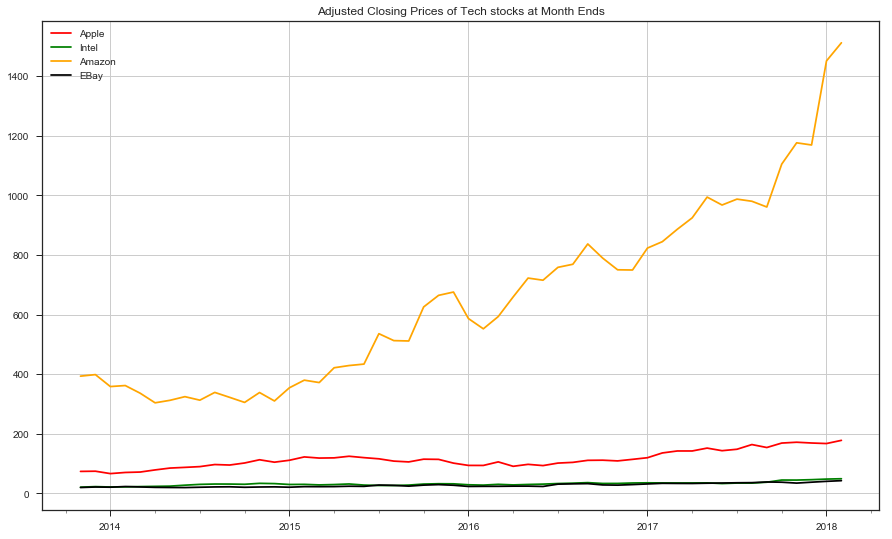

In [485]:
tech_stocks = pd.DataFrame({"Apple": apple_monthend["Adj. Close"],
                      "Intel": intel_monthend["Adj. Close"],
                      "Amazon": amazon_monthend["Adj. Close"],
                      "EBay": ebay_monthend["Adj. Close"]
                      })
display(HTML(tech_stocks.head().to_html()))

plt.cla()
plt.clf()

colors = ['red','green','orange','black']

tech_stocks.plot(grid=True, color=colors)
plt.title("Adjusted Closing Prices of Tech stocks at Month Ends")
plt.show()

To make the data easily visible, we can use two different scales - one for Amazon and other for everything else

<Figure size 1080x648 with 0 Axes>

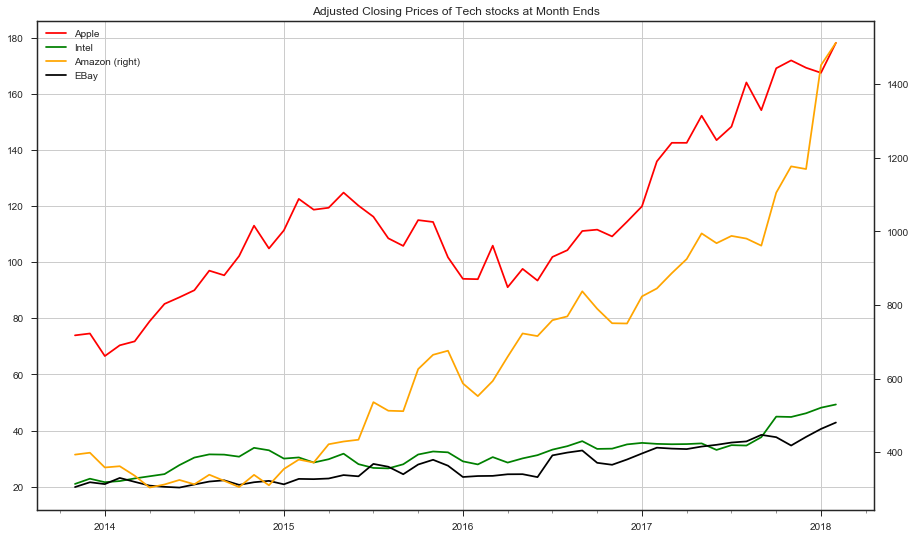

In [486]:
plt.cla()
plt.clf()

colors = ['red','green','orange','black']

tech_stocks.plot(grid=True, color=colors, secondary_y='Amazon')
plt.title("Adjusted Closing Prices of Tech stocks at Month Ends")
plt.show()

The plot is now somewhat more meaningful but a more meaningful interpretation would be to plot the returns instead

<b>Step 3.</b> Auto correlation plot <p>

Autocorrelation plots are used for checking randomness in time series. <br>
This is done by computing autocorrelations for data values at varying time lags. <br>
If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero.

A. Apple

<Figure size 1080x648 with 0 Axes>

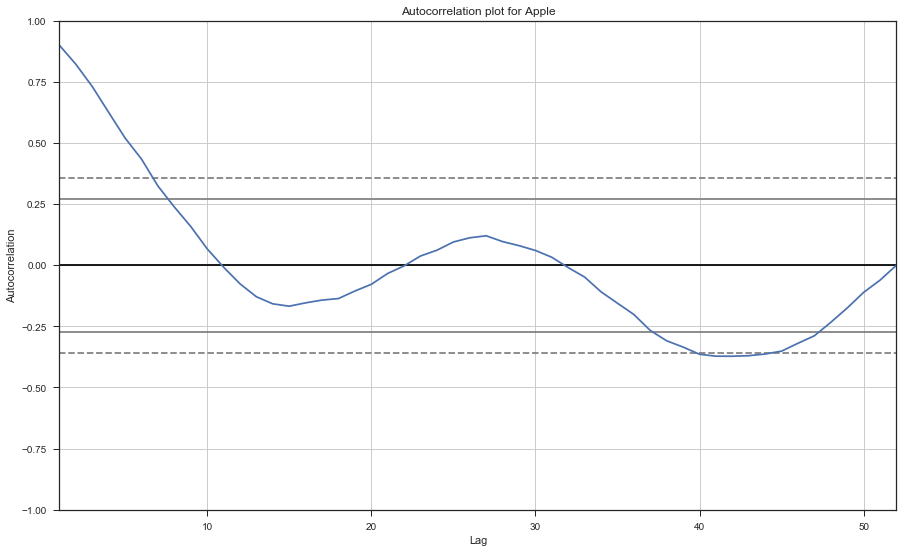

In [487]:

plt.cla()
plt.clf()

plt.figure()
plotting.autocorrelation_plot(apple_monthend["Adj. Close"])
plt.title("Autocorrelation plot for Apple")
plt.show()

B. Amazon

<Figure size 1080x648 with 0 Axes>

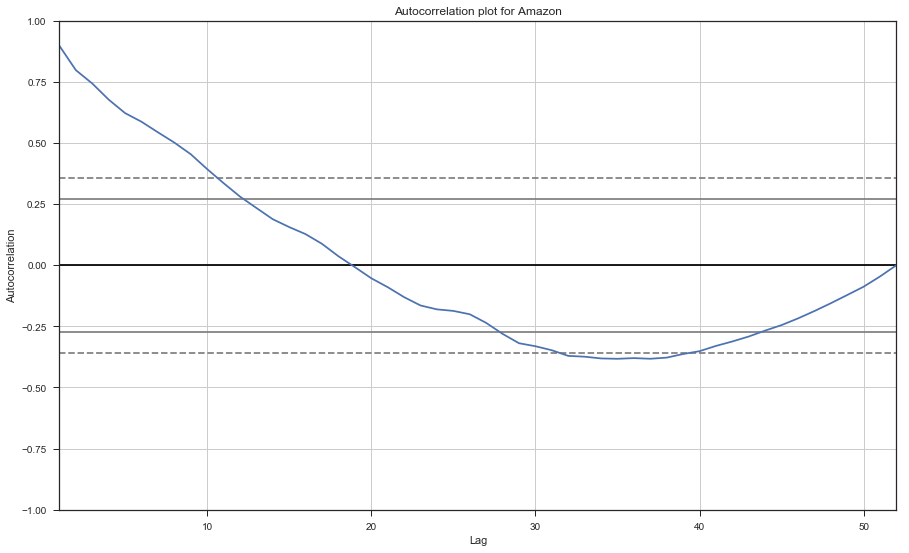

In [488]:

plt.cla()
plt.clf()

plt.figure()
plotting.autocorrelation_plot(amazon_monthend["Adj. Close"])
plt.title("Autocorrelation plot for Amazon")
plt.show()

C. EBay

<Figure size 1080x648 with 0 Axes>

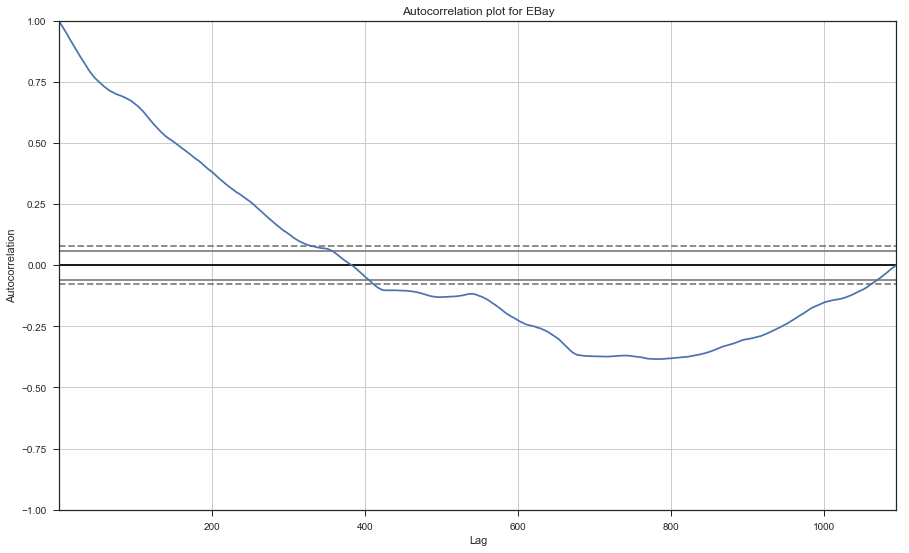

In [489]:

plt.cla()
plt.clf()

plt.figure()
plotting.autocorrelation_plot(ebay["Adj. Close"])
plt.title("Autocorrelation plot for EBay")
plt.show()

D. Intel

<Figure size 1080x648 with 0 Axes>

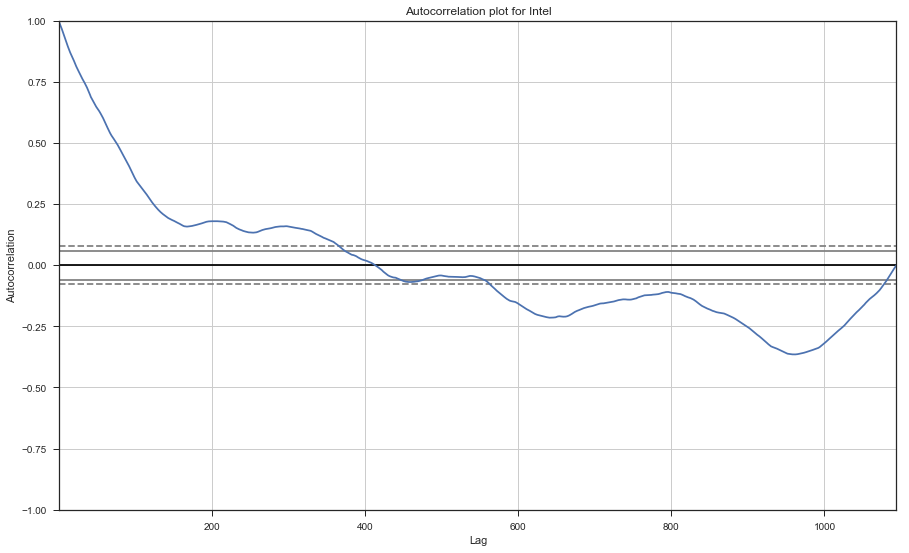

In [490]:
plt.cla()
plt.clf()

plt.figure()
plotting.autocorrelation_plot(intel["Adj. Close"])
plt.title("Autocorrelation plot for Intel")
plt.show()

<b>Observations :</b>
    
TODO

<b>Step 4</b> Calculating Monthly Returns

In [491]:
apple_return = apple_monthend/apple_monthend.shift(1)-1
intel_return = intel_monthend/intel_monthend.shift(1)-1
ebay_return = ebay_monthend/ebay_monthend.shift(1)-1
amazon_return = amazon_monthend/amazon_monthend.shift(1)-1

Lets take a look at the data

In [492]:
print("Apple")
display(HTML(apple_return.head().to_html()))

print("Intel")
display(HTML(intel_return.head().to_html()))

print("EBay")
display(HTML(ebay_return.head().to_html()))

print("Amazon")
display(HTML(amazon_return.head().to_html()))

Apple


,Adj. Close
2013-11-29,NaN
2013-12-31,0.008902
2014-01-31,-0.107697
2014-02-28,0.057474
2014-03-31,0.019953


Intel


,Adj. Close
2013-11-29,NaN
2013-12-31,0.088716
2014-01-31,-0.054517
2014-02-28,0.018617
2014-03-31,0.042569


EBay


,Adj. Close
2013-11-29,NaN
2013-12-31,0.086006
2014-01-31,-0.030347
2014-02-28,0.104699
2014-03-31,-0.060065


Amazon


,Adj. Close
2013-11-29,NaN
2013-12-31,0.013134
2014-01-31,-0.100554
2014-02-28,0.009507
2014-03-31,-0.071072


Lets look at a graphical representation of the data

,Apple,Intel,Amazon,EBay
2013-11-29,NaN,NaN,NaN,NaN
2013-12-31,0.008902,0.088716,0.013134,0.086006
2014-01-31,-0.107697,-0.054517,-0.100554,-0.030347
2014-02-28,0.057474,0.018617,0.009507,0.104699
2014-03-31,0.019953,0.042569,-0.071072,-0.060065


<Figure size 1080x648 with 0 Axes>

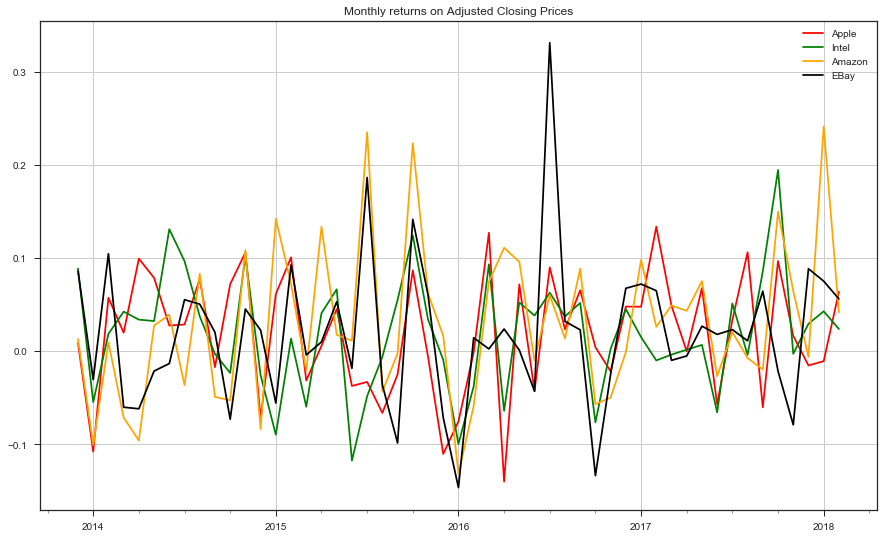

In [493]:
tech_stocks = pd.DataFrame({"Apple": apple_return["Adj. Close"],
                      "Intel": intel_return["Adj. Close"],
                      "Amazon": amazon_return["Adj. Close"],
                      "EBay": ebay_return["Adj. Close"]
                      })
display(HTML(tech_stocks.head().to_html()))

plt.cla()
plt.clf()

colors = ['red','green','orange','black']

tech_stocks.plot(grid=True, color=colors)
plt.title("Monthly returns on Adjusted Closing Prices")
plt.show()

<b> Step 5.</b> Autocorrelation of monthly returns

Lets remove the null values first


In [494]:
apple_return["Adj. Close"].dropna(inplace=True)
intel_return["Adj. Close"].dropna(inplace=True)
ebay_return["Adj. Close"].dropna(inplace=True)
amazon_return["Adj. Close"].dropna(inplace=True)

A. Apple

<Figure size 1080x648 with 0 Axes>

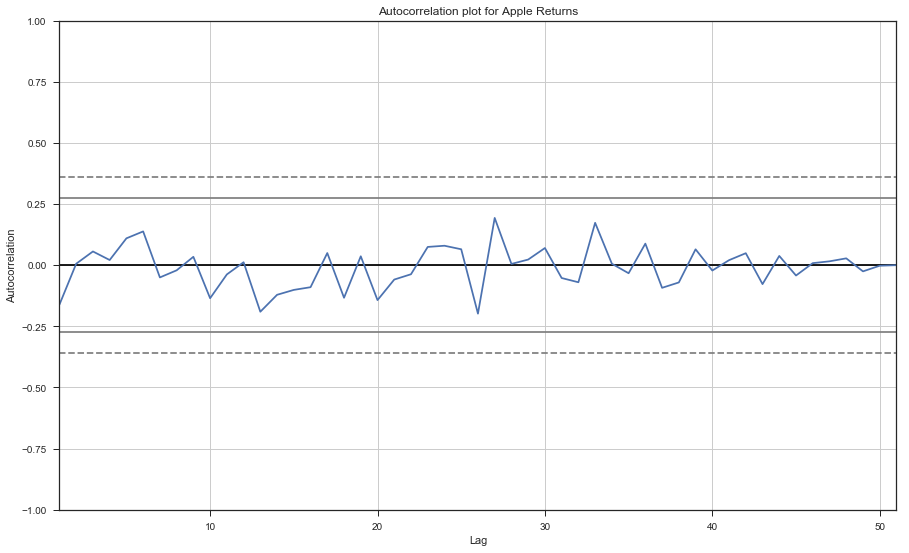

In [495]:
plt.cla()
plt.clf()

plt.figure()
plotting.autocorrelation_plot(apple_return["Adj. Close"])
plt.title("Autocorrelation plot for Apple Returns")
plt.show()

B. Intel

<Figure size 1080x648 with 0 Axes>

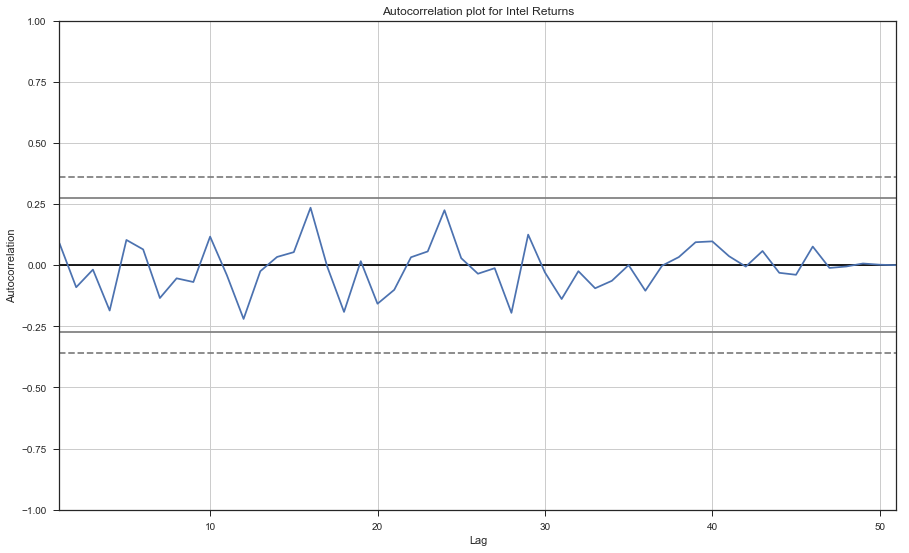

In [496]:
plt.cla()
plt.clf()

plt.figure()
plotting.autocorrelation_plot(intel_return["Adj. Close"])
plt.title("Autocorrelation plot for Intel Returns")
plt.show()

C. EBay

<Figure size 1080x648 with 0 Axes>

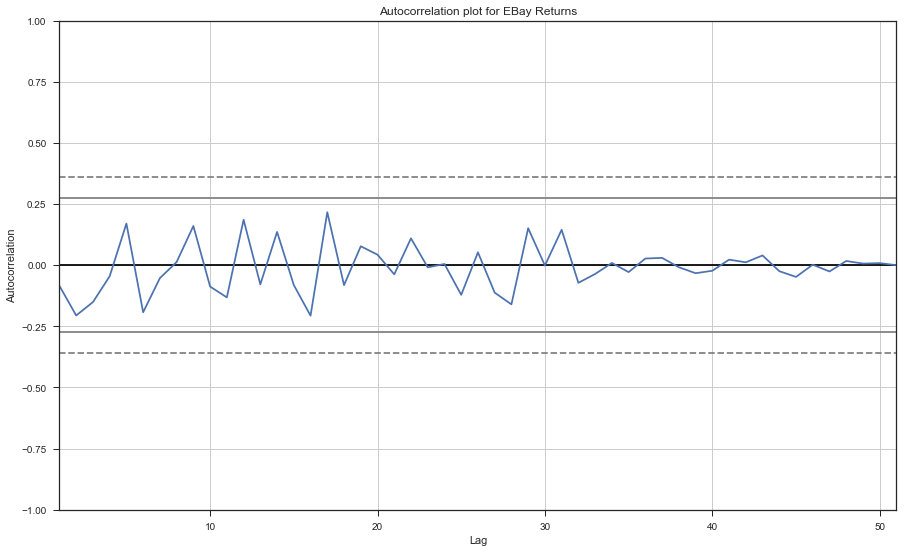

In [497]:
plt.cla()
plt.clf()

plt.figure()
plotting.autocorrelation_plot(ebay_return["Adj. Close"])
plt.title("Autocorrelation plot for EBay Returns")
plt.show()

D. Amazon

<Figure size 1080x648 with 0 Axes>

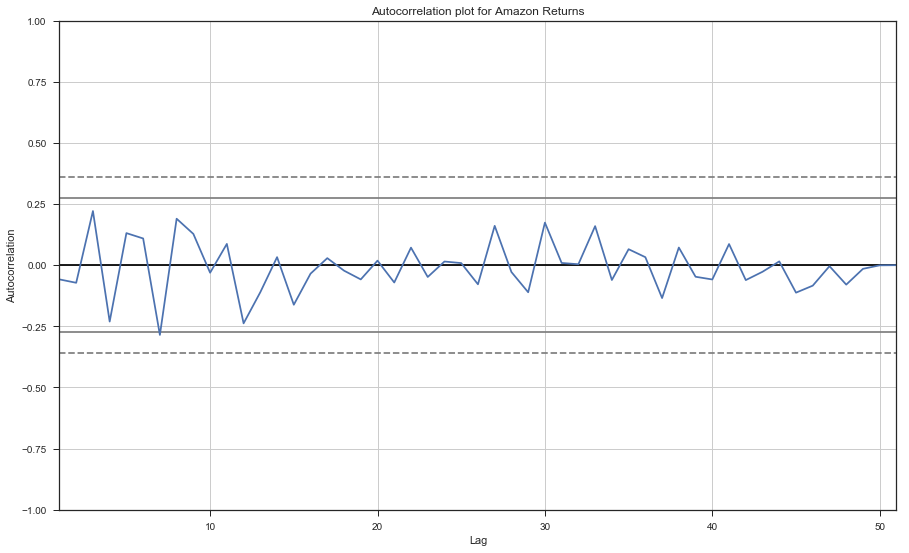

In [498]:
plt.cla()
plt.clf()

plt.figure()
plotting.autocorrelation_plot(amazon_return["Adj. Close"])
plt.title("Autocorrelation plot for Amazon Returns")
plt.show()

<b> Observations : </b> ToDo

<b>Step 7</b>. Visualize the correlation between the returns of all pairs of stocks using a scatterplot matrix

In [499]:
tech_stock_return = pd.DataFrame({"Apple": apple_return["Adj. Close"],
                      "Intel": intel_return["Adj. Close"],
                      "Amazon": amazon_return["Adj. Close"],
                      "EBay": ebay_return["Adj. Close"]
                      })
display(HTML(tech_stock_return.head().to_html()))



,Apple,Intel,Amazon,EBay
2013-12-31,0.008902,0.088716,0.013134,0.086006
2014-01-31,-0.107697,-0.054517,-0.100554,-0.030347
2014-02-28,0.057474,0.018617,0.009507,0.104699
2014-03-31,0.019953,0.042569,-0.071072,-0.060065
2014-04-30,0.099396,0.033935,-0.095833,-0.061731


C:\Users\Kaustubh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x648 with 0 Axes>

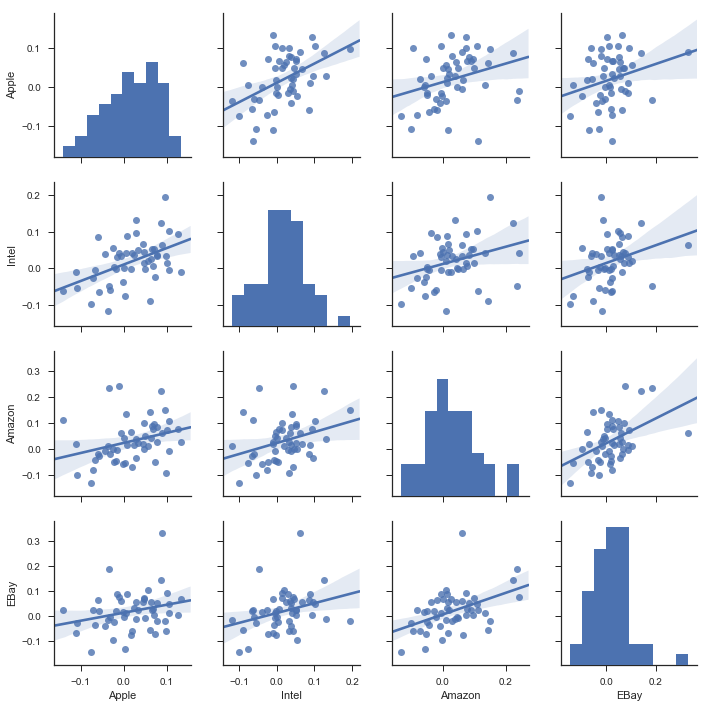

In [500]:
plt.cla()
plt.clf()

sns.set(style="ticks")
sns.pairplot(tech_stock_return, kind="reg")
plt.show()

<b> Step 8 </b>. Visualize the correlation of the returns of all pairs of stocks 

<Figure size 1080x648 with 0 Axes>

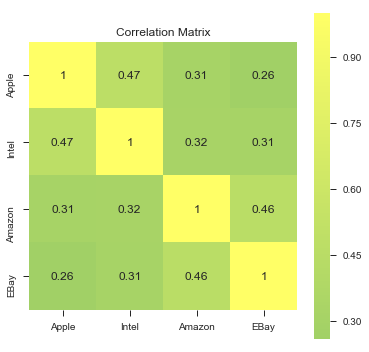

In [501]:
plt.cla()
plt.clf()

corr_matrix = tech_stock_return[['Apple','Intel','Amazon','EBay']].corr().round(2)

fig = plt.figure(figsize = (6, 6))
sns.heatmap(corr_matrix, annot=True, center=0, square=True, cmap="summer")
plt.title("Correlation Matrix")
plt.show()